In [61]:
import numpy as np
import os as os
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [3]:
os.chdir(r'C:\Users\Sebbi\Desktop\maxwell' )

path = os.getcwd()

def FileNames(path):
    filelist = []

    pathExists = os.path.exists(path)
    isDir = os.path.isdir(path)

    if pathExists and isDir:
        for dirpaths, dirs, files in os.walk(path):
            for file in files:
                filelist.append(os.path.join(dirpaths, file))
    
    return filelist


In [34]:
t = []
x = []
y = []
v_x = []
v_y = []
v = []

for file in FileNames(path):
    with open(file, 'r') as f:
        for i in range(2):
            next(f)

        for line in f:
            column = line.split('\t')

            t = np.append(t, float(column[0]))
            x = np.append(x, float(column[1])*0.22*0.01)
            y = np.append(y, float(column[2])*0.22*0.01)

for i in range(len(t) - 1):
    v_x = np.append(v_x, (x[i+1] - x[i])/(t[i+1] - t[i]))
    v_y = np.append(v_y, (y[i+1] - y[i])/(t[i+1] - t[i]))
    v = np.append(v, np.sqrt(v_y[i]**2 + v_x[i]**2))


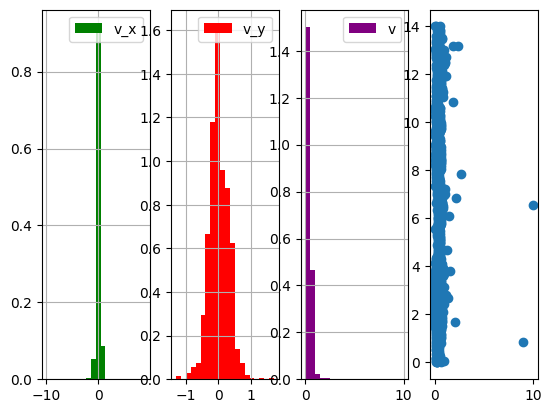

In [67]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
ax1.hist(v_x, bins = 20, density = True, label = 'v_x', color = 'g')
ax2.hist(v_y, bins = 20, density = True, label = 'v_y', color = 'r')
ax3.hist(v, bins = 20, density = True, label = 'v', color = 'purple')
ax4.scatter(v, t[:-1])
ax1.legend()
ax2.legend()
ax3.legend()
ax1.grid()
ax2.grid()
ax3.grid()
plt.show() 